In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
test = pd.read_csv('test.csv')

In [3]:
train = pd.read_csv('train.csv')
train.head(17)

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,487,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1.60,0.2,7.80,7.60,0,0,0
1,1555,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.00,1.0,7.30,7.10,0,0,0
2,205,NaN,10.0,0.05,0.24,NaN,0.100,NaN,NaN,NaN,...,NaN,1.0,1.0,1.00,1.0,7.80,7.70,0,0,0
3,1228,NaN,NaN,0.09,0.05,0.641,0.932,NaN,NaN,NaN,...,1.0,NaN,NaN,0.50,0.5,7.44,7.58,0,0,0
4,470,NaN,NaN,0.06,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.20,44.0,7.70,8.00,0,1,0
5,614,NaN,NaN,0.12,0.13,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.50,0.5,8.64,8.45,0,0,1
6,1420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,1.0,2.0,1.00,1.0,7.50,8.00,0,0,0
7,188,NaN,NaN,0.23,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.50,0.5,7.45,7.40,1,1,0
8,1286,NaN,50.0,0.20,0.23,NaN,0.091,NaN,6.5,NaN,...,NaN,NaN,NaN,0.72,0.5,7.50,7.70,1,0,1
9,736,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.50,0.5,7.53,7.26,0,0,0


In [4]:
train.columns

Index(['station_id', 'Aluminium_2019', 'Aluminium_2020', 'Ammonium_2019',
       'Ammonium_2020', 'Boron_2019', 'Boron_2020', 'Chloride_2019',
       'Chloride_2020', 'Coli-like-bacteria-Colilert_2019',
       'Coli-like-bacteria-Colilert_2020', 'Coli-like-bacteria_2019',
       'Coli-like-bacteria_2020', 'Colony-count-at-22-C_2019',
       'Colony-count-at-22-C_2020', 'Color-Pt-Co-unit_2019',
       'Color-Pt-Co-unit_2020', 'Color-Pt/Co-scale_2019',
       'Color-Pt/Co-scale_2020', 'Electrical-conductivity_2019',
       'Electrical-conductivity_2020', 'Enterococci_2019', 'Enterococci_2020',
       'Escherichia-coli-Colilert_2019', 'Escherichia-coli-Colilert_2020',
       'Escherichia-coli_2019', 'Escherichia-coli_2020', 'Fluoride_2019',
       'Fluoride_2020', 'Iron_2019', 'Iron_2020', 'Manganese_2019',
       'Manganese_2020', 'Nitrate_2019', 'Nitrate_2020', 'Nitrite_2019',
       'Nitrite_2020', 'Odour-dilution-level_2019',
       'Odour-dilution-level_2020', 'Oxidability_2019', 'Ox

In [5]:
print(train.shape)
print(test.shape)

(440, 58)
(189, 57)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   station_id                        440 non-null    int64  
 1   Aluminium_2019                    103 non-null    float64
 2   Aluminium_2020                    94 non-null     float64
 3   Ammonium_2019                     307 non-null    float64
 4   Ammonium_2020                     290 non-null    float64
 5   Boron_2019                        116 non-null    float64
 6   Boron_2020                        108 non-null    float64
 7   Chloride_2019                     111 non-null    float64
 8   Chloride_2020                     114 non-null    float64
 9   Coli-like-bacteria-Colilert_2019  125 non-null    float64
 10  Coli-like-bacteria-Colilert_2020  125 non-null    float64
 11  Coli-like-bacteria_2019           322 non-null    float64
 12  Coli-lik

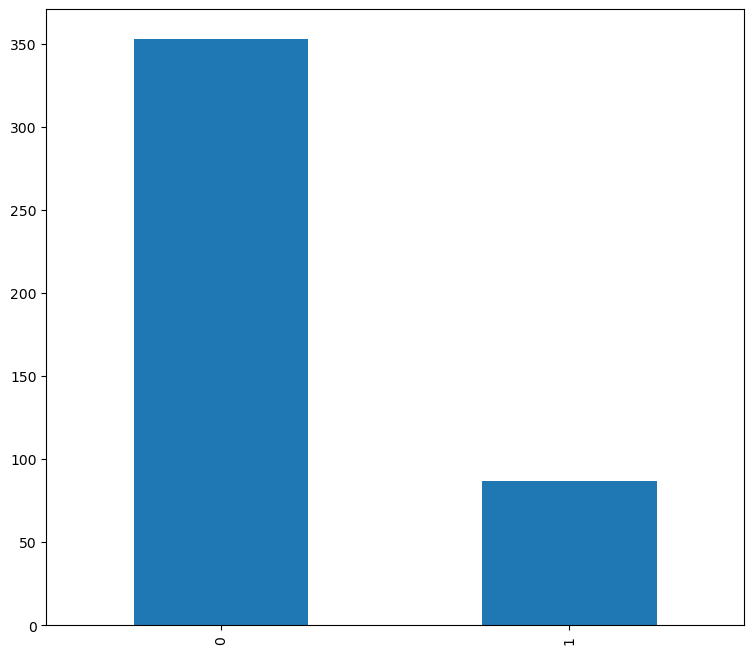

In [7]:
plt.figure(figsize=(9,8))
train['compliance_2019'].value_counts().plot(kind='bar')
plt.show()

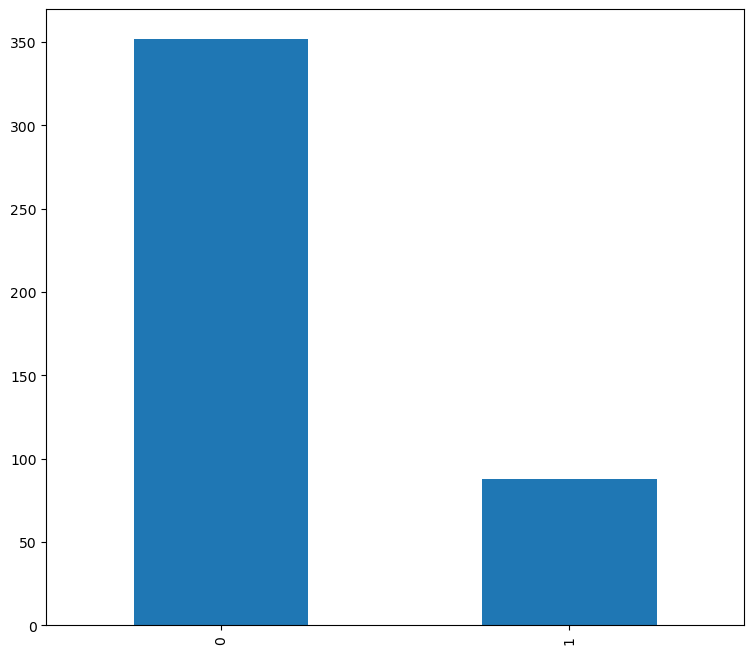

In [8]:
plt.figure(figsize=(9,8))
train['compliance_2020'].value_counts().plot(kind='bar')
plt.show()

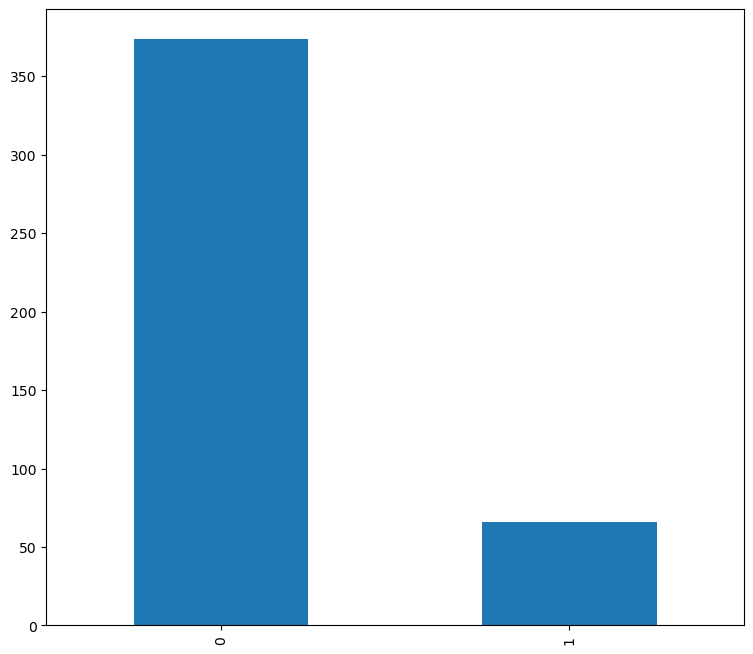

In [9]:
plt.figure(figsize=(9,8))
train['compliance_2021'].value_counts().plot(kind='bar')
plt.show()

In [10]:
train.fillna(0.0, inplace=True)
test.fillna(0.0, inplace=True)

In [11]:
from sklearn.utils import resample
print(train[train['compliance_2021']==0]['compliance_2021'].value_counts())
df_majority = train[train['compliance_2021']==1]
df_minority = train[train['compliance_2021']==0]

df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample without replacement
                                 n_samples=374,     # to match minority class
                                 random_state=123) # reproducible results


# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.sort_index(inplace=True)

y = df_downsampled['compliance_2021']
X = df_downsampled.drop('compliance_2021', axis=1)
print(y.value_counts())

0    374
Name: compliance_2021, dtype: int64
0    374
1    374
Name: compliance_2021, dtype: int64


In [12]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=9)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                test_size=test_ratio/(test_ratio + validation_ratio), random_state=4) 

In [13]:
# replace nan values with median values by using simpleinputer 
num_imp = SimpleImputer(strategy = 'mean')
num_imp.fit(train)

# X_imp_train = pd.DataFrame(num_imp.transform(X_train))
# X_imp_test = pd.DataFrame(num_imp.transform(X_test))
# X_imp_val = pd.DataFrame(num_imp.transform(X_val))

std = StandardScaler()
std.fit(X_train)

X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)
X_val_std = std.transform(X_val)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train_std,y_train)

y_pred = knn.predict(X_test_std)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
print(f'Accuracy of model on the test data {accuracy_score(knn.predict(X_test_std), y_test)}')
print(f'Accuracy of model on the validation data {accuracy_score(knn.predict(X_val_std), y_val)}')

Confusion matrix:
[[23 10]
 [ 2 40]]
Accuracy of model on the test data 0.84
Accuracy of model on the validation data 0.76


In [15]:
lr = LogisticRegression()
lr.fit(X_train_std,y_train)
y_pred =lr.predict(X_test_std)

confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)

print(f'Accuracy of model on the test data {accuracy_score(lr.predict(X_test_std), y_test)}')
print(f'Accuracy of model on the validation data {accuracy_score(lr.predict(X_val_std), y_val)}')

Confusion matrix:
[[25  8]
 [11 31]]
Accuracy of model on the test data 0.7466666666666667
Accuracy of model on the validation data 0.6933333333333334


In [16]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_std,y_train)
y_pred = rfc.predict(X_test_std)

confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
accuracy_score(rfc.predict(X_test_std), y_test)

print(f'Accuracy of model on the test data {accuracy_score(rfc.predict(X_test_std), y_test)}')
print(f'Accuracy of model on the validation data {accuracy_score(rfc.predict(X_val_std), y_val)}')

Confusion matrix:
[[32  1]
 [ 0 42]]
Accuracy of model on the test data 0.9866666666666667
Accuracy of model on the validation data 0.9733333333333334


In [17]:
# rfm = RandomForestClassifier(random_state=2)

In [18]:
# parameters = {
#     "n_estimators":[5,10,50,100,250,500],
#     "max_depth":[2,4,8,16,32,48,None, 100],
#     "max_features":[1,5,10,20,30,None],
#     "criterion":['gini', 'entropy'],
    
# }

# for i in range(13, 15):
#     rfm = RandomForestClassifier(random_state=i)
#     cv = GridSearchCV(rfm,parameters,cv=5)
#     cv.fit(X_train_std,y_train)
#     print(i, cv.best_params_)

In [19]:
# print(cv.best_params_)

In [20]:
# random 1 {'criterion': 'gini', 'max_depth': 48, 'n_estimators': 50} 
# random 2 {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}
#  'random_state':11, 'n_estimators': 500, 'max_depth':16, 'criterion':'gini'}
rfm = RandomForestClassifier(random_state=5)
rfm.fit(X_train_std,y_train)
y_pred = rfm.predict(X_test_std)

confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
accuracy_score(rfc.predict(X_test_std), y_test)

print(f'Accuracy of model on the test data {accuracy_score(rfm.predict(X_test_std), y_test)}')
print(f'Accuracy of model on the validation data {accuracy_score(rfm.predict(X_val_std), y_val)}')

Confusion matrix:
[[32  1]
 [ 0 42]]
Accuracy of model on the test data 0.9866666666666667
Accuracy of model on the validation data 0.9733333333333334


# Cross validation

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# #  random state 11 

# check_l = [
#     {'random_state':3, 'n_estimators': 250, 'max_depth':32, 'criterion':'gini'},
#     {'random_state':4, 'n_estimators': 10, 'max_depth':16, 'criterion':'gini'},
#     {'random_state':5, 'n_estimators': 250, 'max_depth':32, 'criterion':'gini'},
#     {'random_state':6, 'n_estimators': 10, 'max_depth':32, 'criterion':'gini'},
#     {'random_state':7, 'n_estimators': 100, 'max_depth':16, 'criterion':'gini'},
#     {'random_state':8, 'n_estimators': 250, 'max_depth':16, 'criterion':'gini'},
#     {'random_state':9, 'n_estimators': 100, 'max_depth':16, 'criterion':'gini'},
#     {'random_state':10, 'n_estimators': 100, 'max_depth':16, 'criterion':'gini'},
#     {'random_state':11, 'n_estimators': 500, 'max_depth':16, 'criterion':'gini'},
#     {'random_state': 12, 'criterion': 'gini', 'max_depth': 16, 'n_estimators': 250},
#     {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50, 'random_state':13},
#     {'criterion': 'gini', 'max_depth': 16, 'max_features': 1, 'n_estimators': 500, 'random_state':13},
#     {'criterion': 'gini', 'max_depth': 32, 'max_features': 1, 'n_estimators': 50, 'random_state':14}
# ]

# res = []
# best = 0.9566101694915254

# for d in check_l:
#     cv_dict = cross_val_score(RandomForestClassifier(random_state = d['random_state'],
#                                                     max_depth = d['max_depth'],
#                                                     criterion='gini',
#                                                     n_estimators=d['n_estimators']),
#                                                     X_train_std, y_train, cv=10)
    
#     res.append(cv_dict.mean())
#     if best < cv_dict.mean():
#         best = cv_dict.mean()
#         print(best)
    
cv_dict = cross_val_score(RandomForestClassifier(random_state = 5),
                                                X_train_std, y_train, cv=10)

In [22]:
# res
cv_dict.mean()

0.9599152542372881

In [29]:
#test_data_imp = SimpleImputer(strategy = 'median')
#test_data_imp.fit(test)

#X_imp_test_data = pd.DataFrame(test_data_imp.transform(test))


std = StandardScaler()
std.fit(X_train)
X_test_data = std.transform(test)
len(X_test_data)

189

In [30]:
y_pred = rfm.predict(X_test_data)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0]


In [31]:
df = pd.DataFrame()
df['station_id'] = test.station_id
df['compliance_2021'] = y_pred

In [32]:
df.compliance_2021.value_counts()

0    174
1     15
Name: compliance_2021, dtype: int64

In [27]:
df

,station_id,compliance_2021
0,163,0
1,167,0
2,171,0
3,174,0
4,178,0
...,...,...
184,1941,0
185,2087,0
186,2206,1
187,2303,0


In [28]:
df.to_csv('submission.csv', index=False)